# K nearest neighbour  
not much of math is involved in this so we would just stick to the concept and get ourself acquainted analogous examples 

- This is a non parametric model - which means there are no weights associated with the features i.e no statistical quantity is estimated 

- There is no as such assumption in non parametric models like the distribution of target variable etc 

- It can be used for both classification where you decide the class of the instance based on the class of the k datapoints (majority wins) and regression where you just take the average of k datapoints around the instance  

## Minkowski distance

Thank you for the clarification. The Minkowski distance is indeed a well-known distance metric used in mathematics and data science. It is a generalization of several other distance metrics, including the Euclidean distance and the Manhattan distance.

The Minkowski distance between two points, often denoted as "P" and "Q," in an n-dimensional space is defined as:

[D(P, Q) = \left(\sum_{i=1}^{n} |P_i - Q_i|^p\right)^{\frac{1}{p}}\]

Here:

- \(D(P, Q)\) represents the Minkowski distance between points \(P\) and \(Q\).
- \(n\) is the number of dimensions (features) in the space.
- \(P_i\) and \(Q_i\) are the respective coordinates of points \(P\) and \(Q\) in the \(i\)-th dimension.
- \(p\) is a positive real number, which is a parameter that determines the "order" of the Minkowski distance. When \(p = 2\), it reduces to the Euclidean distance, and when \(p = 1\), it becomes the Manhattan distance.

In summary, the Minkowski distance is a flexible distance metric that can take on various forms depending on the value of the parameter \(p\). It is commonly used in clustering, classification, and regression algorithms to measure the similarity or dissimilarity between data points in multi-dimensional spaces.

**It is just a generic formula to find the distance between 2 points, you put the dimension (p value ) you getthe distance between points in respective dimensions** 

## There is no as such relation between the graph which they have show in the KNN lecture notebook 

To understand the relation between overfitting and K consdier this if K = 1 the model is a over fit why because it fails to generalize the assumption, suppose you want to go to a resturant you ask one friend and he said the food is good there but that is his opinion it is not a general oppinion shared by group hence if k =1  the model overfits and when K is very high it underfits 

You can consider that with less value of K we will have a very twisty and curvy line where as for a large value of K we will have a line similar to linear line 

https://bl.ocks.org/duhaime/raw/8f7bb6a720d3d654c1ef00f777e97707/  

Now comming back to this visual representation consider the tip of the cursor arrow to be test datapoint now if you set the k = 1 and move the cursor you will notice for a small movement in curose the class changes so what is exactly happening, so for every small change the model is learning and kind of over learns but when we set the value of k to be let's say 10 then the the class is not that sensitive to data hence it has generalized the learning hence if we increase the value of k by alot then it over generalizes and make the mode underfit 

so samll change in the datapoint the class changes when k = 1 which means a very high variance and low bias i.e did not generalize this is perfect explation of overfitting model where varaince is super high and bais is super low 

Arnav has explained it very well in the video at 1:27:00 mins 

**some tricks of trade**

The value of k is usually odd so that there is a clear distribution of classes that is if k = 5 we can have 2,3 but when k = 4 we can have 2,2 i.e 2 from class A and class B

If the value of k is very large it will become computationally heavy as it will have to calculate lot of distances 

The lecture notes are quite simple so not need to repeat the stuff here 

# Here is how the dicision boundary made , rather call it a dilemma boundry, The decision boundry is actually the line drawn over the data points which are not sure to which class do they belong 
## this is why with k = 1 we will have a complex boundary 

take an example of yourself you live in ballia which some people call it is in bihar and some call it is in up so you say you life on the border where divides bihar and up same is with dilemma 

In [220]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # this gives a grey background

In [221]:
pwd

'C:\\Users\\Deepu\\Downloads'

In [222]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [223]:
df = pd.read_csv('diabetes.csv.csv')

In [224]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [225]:
df.shape

(768, 9)

In [226]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [227]:
df.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


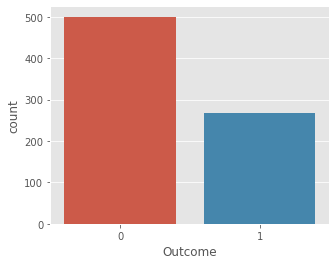

In [228]:
# let's check if we are dealing with imbalance data set
plt.figure(figsize = (5,4))
sns.countplot(df.Outcome)
plt.show()
# so yes
# we will have to use stratify to split the data so that proporation of class is mainted in the split 

In [229]:
# let's make an array of independent and dependent varialbes 
X = df.drop('Outcome',axis = 1).values # independent/features
y = df.Outcome.values # dependent/ target 

In [230]:
#let's train test split 
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30, stratify = y)
# stratify makes sure that we have the same propration of class during split and one class does not domination on other 

In [132]:
from sklearn.neighbors import KNeighborsClassifier 

Let's fit model on one value of K then we first

In [133]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7922077922077922

In [134]:
from sklearn.metrics import accuracy_score 

In [135]:
accuracy_score(y_test,knn.predict(X_test)) 
# so either you do it with method or function it's the same math 

0.7922077922077922

# Now to find the value of K is a bit of a task we actuall do not know the value of K so we will run knn for differnet value of k on train data and we will check the accuracy score on the test data and based on the accuracy on the test data we will decide the value of K 

In [136]:
k_values = np.arange(1,9)
accuracy_train = []
accuracy_test = []
for k in range(1,9):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train,y_train)
    score_train = knn_model.score(X_train,y_train)
    score_test = knn_model.score(X_test,y_test)
    accuracy_train.append(score_train)
    accuracy_test.append(score_test)

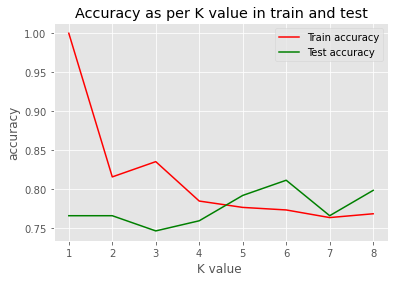

In [162]:
# let's plot the graph
plt.figure(figsize = (6,4))
ax = plt.gca()
ax.plot(k_values,accuracy_train, label = 'Train accuracy',color = 'red')
ax.plot(k_values,accuracy_test, label = 'Test accuracy',color = 'green')
ax.legend()
ax.set_title('Accuracy as per K value in train and test')
ax.set_xlabel('K value ')
ax.set_ylabel('accuracy')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


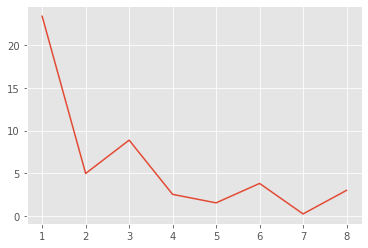

In [163]:
sns.lineplot(k_values,abs(np.array(accuracy_train)*100 - np.array(accuracy_test)*100))
plt.show()

We can see at k = 7 the difference between test and train data is lowest

In [139]:
knn_ = KNeighborsClassifier(n_neighbors = 7)
knn_.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [151]:
y_train_pred = knn_.predict(X_train)

In [153]:
accuracy_score(y_train,y_train_pred)

0.7638436482084691

In [154]:
y_test_pred = knn_.predict(X_test)

In [155]:
accuracy_score(y_test,y_test_pred)

0.7662337662337663

In [140]:
# Since we have an imblance data we will don't focous much on accuracy for our model evaluation 
from sklearn.metrics import confusion_matrix

In [141]:
confusion_matrix(y_train,knn_.predict(X_train))

array([[347,  53],
       [ 92, 122]], dtype=int64)

# [[TN, FP]
# [FN, TP]]


In [157]:
# precision is how many times you are saying postitive and how many times its correct 
# TP/TP + FP
print(122/(122+53))

0.6971428571428572

In [158]:
# recall if you have 5 chapter how many can you recall i.e
# TP/TP + FN
122/(122+92)

0.5700934579439252

In [165]:
# test 
confusion_matrix(y_test,y_test_pred)

array([[82, 18],
       [18, 36]], dtype=int64)

In [166]:
# precesion 
36/(36+18)

0.6666666666666666

In [167]:
# recall
36/(36+18)

0.6666666666666666

In [171]:
from sklearn.metrics import roc_auc_score

In [173]:
roc_auc_score(y_test,y_test_pred)

0.7433333333333334

## Let's also make a roc_auc plot to understand visually 
but before that let's revist the roc_auc score meaning 

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) value is a single scalar metric that provides valuable insights into the overall performance of a binary classification model. Specifically, it quantifies the model's ability to discriminate between the positive and negative classes, regardless of the threshold used for classification. Here's what the ROC AUC value tells you:

1. Discriminative Power: The ROC AUC value measures how well your model can **distinguish** between the positive class and the negative class. A higher ROC AUC score indicates that the model is better at distinguishing between the two classes. A score of 1 represents perfect **discrimination**, where the model can perfectly separate the two classes.

2. Threshold-Independent: Unlike metrics such as accuracy or F1-score, which depend on a specific threshold, the ROC AUC considers the model's performance across all possible threshold values. It assesses the model's ability to rank examples correctly without being tied to a particular decision point. This makes ROC AUC a robust and threshold-independent evaluation metric.

3. Ranking Quality: ROC AUC evaluates how well your model ranks positive examples above negative examples. It measures the probability that a randomly chosen positive example will have a higher predicted probability of being positive than a randomly chosen negative example.

4. **Model Comparison: ROC AUC is useful for comparing different models or algorithms. If you have multiple classifiers and want to determine which one performs better in terms of class separation, you can compare their ROC AUC scores. The model with the higher ROC AUC score is generally considered better at distinguishing between the classes.**

5. Trade-Off Analysis: ROC AUC helps you assess the trade-off between Sensitivity (True Positive Rate) and Specificity (True Negative Rate) without selecting a specific threshold. It provides a global view of the model's performance across the entire range of possible operating points.

In summary, the ROC AUC value is a valuable metric for assessing the overall discriminative power and ranking quality of a binary classification model. A higher ROC AUC score indicates better model performance in terms of separating positive and negative examples, and it is particularly useful when you want to evaluate and compare models independently of the threshold selection.

## Analogy 

Imagine you have two superhero friends, Superman and Batman. They both have superpowers and are really good at saving the day. You want to see who's better at being a superhero.

Now, instead of looking at just one thing, like who can fly the fastest or who's the strongest, you want to judge them based on many different things they can do, like flying, lifting heavy things, and catching bad guys.

So, you collect a bunch of tests, like flying races and weightlifting contests. For each test, you give points to Superman and Batman. If Superman does better on a test, he gets more points, and if Batman does better, he gets more points.

The ROC AUC is like a special way to add up all these points and see who's the better superhero overall. If the ROC AUC is 1, it means Superman wins all the tests, and he's the best superhero overall. But if the ROC AUC is lower, it means there's a mix of results, and it's not clear who's better at being a superhero.

So, the ROC AUC helps us figure out who's the best superhero by looking at all the different things they can do and how well they do them.

# linking

Certainly! Let's link the concept of ROC AUC to the superhero example and the diabetes dataset:

Imagine you have a special machine called the "Superhero Detector," and you want to use it to figure out who the real superheroes are among a group of people. In this case:

- Class 1: These are the real superheroes, just like Superman and Batman. They have diabetes.
- Class 0: These are regular people, like your everyday citizens. They don't have diabetes.

Here's how it works:

1. **Superhero Detector**: Your Superhero Detector is like a magic machine that uses measurements from people, such as their health stats (like blood sugar levels, age, weight, etc.), to decide if someone is a superhero (Class 1) or not (Class 0).

2. **Superhero Testing**: You use the Superhero Detector on a bunch of people, and it gives each person a "Superhero Score." The higher the score, the more likely they are a real superhero (Class 1), just like how you might give Superman and Batman scores based on their superpowers.

3. **ROC Curve and ROC AUC**: Now, you want to see how good your Superhero Detector is at telling real superheroes from regular people. You create an ROC curve by changing the Superhero Score threshold. This curve shows how well your detector can separate the real superheroes from the regular folks at different thresholds, just like how you might see how well Superman and Batman perform in different superhero contests.

- If the ROC AUC is 1, it means your Superhero Detector is perfect, just like Superman and Batman always winning superhero contests. It can perfectly tell who the real superheroes are.

- If the ROC AUC is less than 1 but better than random guessing (0.5), it means your Superhero Detector is pretty good at distinguishing between real superheroes and regular people, just like how Superman and Batman usually outperform regular folks in contests.

- If the ROC AUC is close to 0.5, it means your Superhero Detector is not much better than random guessing, and it might have a hard time telling real superheroes from regular people.

So, ROC AUC helps you measure how well your Superhero Detector (machine learning model) can identify the true superheroes (people with diabetes) among the regular people (people without diabetes) based on their health measurements. The higher the ROC AUC, the better your detector is at this superpower-like task!

**You can say that the ROC AUC score tells you how good your model is at discriminating between Class 0 and Class 1. Specifically, it measures the model's ability to distinguish between the two classes, where Class 0 and Class 1 represent different categories, such as "non-diabetic" (0) and "diabetic" (1) in a diabetes dataset.**

**So, your statement can be rephrased as:**

**"The ROC AUC score tells us how well our model can discriminate between Class 0 (e.g., non-diabetic) and Class 1 (e.g., diabetic), effectively distinguishing one class from the other."**

**In other words, it assesses the model's capacity to correctly classify and separate data points into their respective classes.**

in a simple word consdier yourself as model and you are discrimination apples and oranges in two different boxes and roc_tells
us you well are you doing if it is close to 1 this means you are doing well if it is 0.5 or below this means your are just randomly put apples and oranges in boxes 

**Also note TPR is sensitivity where as 1-fpr is specificity**

In [177]:
y_pred_proba = knn.predict_proba(X_test)[:,1] # getting the probability of class 1 

In [179]:
from sklearn.metrics import roc_curve 

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

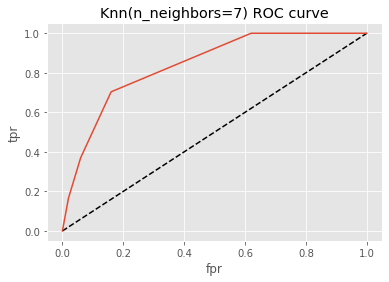

In [186]:
plt.plot([0,1],[0,1],'k--') # this is to to draw the baseline 
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

# This suggests that your model has some ability to distinguish between the two classes.

# Conversly we can also do a gridserch cv to find the best value of K we will pass the entire dataset without train test split 

In [188]:
from sklearn.model_selection import GridSearchCV

In [235]:
param_grid = {'n_neighbors':range(1,50)}

In [236]:
knn_mod = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn_mod,param_grid =  param_grid, scoring = 'accuracy',cv = 5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy')

In [239]:
knn_cv.best_params_

{'n_neighbors': 14}

In [240]:
knn_cv.best_score_

0.7578558696205755

In [1]:
# revise the roc, tpr,fpr , how is boundry formed and that's pretty much every thing.